In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.constants as c
import astropy.units  as u

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 
import sys
sys.path.append('../../common_code') 
from PostProcessingScripts import * 

# to make the screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### data set from https://gwlandscape.org.au/publication/Q29tcGFzUHVibGljYXRpb25Ob2RlOjY2/  

In [28]:
path = '/Users/floorbroekgaarden/Downloads/GROWL/VanSon/COMPAS_Output_wWeights.h5' # change this line!  
fdata = h5.File(path, 'r')

print(fdata.keys())
print(fdata['BSE_Double_Compact_Objects'].keys())
print(fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned'].keys())
# print(fdata['data']['combined_dataframes'].keys())


<KeysViewHDF5 ['BSE_Double_Compact_Objects', 'BSE_RLOF', 'Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']>
<KeysViewHDF5 ['CE_Event_Counter', 'Immediate_RLOF>CE', 'MT_Donor_Hist(1)', 'MT_Donor_Hist(2)', 'Mass(1)', 'Mass(2)', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merges_Hubble_Time', 'Metallicity@ZAMS(1)', 'Optimistic_CE', 'SEED', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'mixture_weight']>
<KeysViewHDF5 ['DCOmask', 'merger_rate', 'merger_rate_z0', 'redshifts']>


In [30]:

M1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()]
weights = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['merger_rate_z0'][()]
DCOmask = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['DCOmask'][()]
print(len(M1), len(weights), len(DCOmask), len(M1[DCOmask]))


M1_BBHs = M1[DCOmask]

# plt.show()

2484379 1401406 2484379 1401406


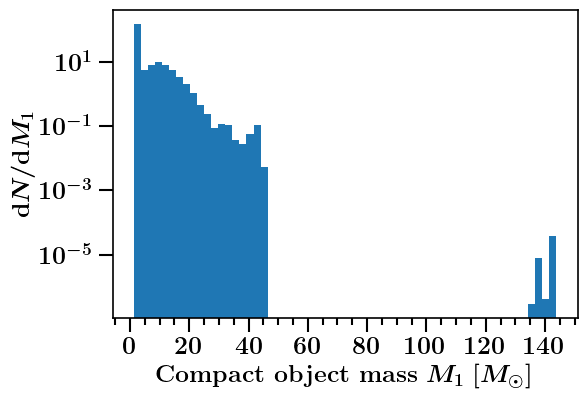

In [37]:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))

plt.hist(M1_BBHs, weights=weights, bins=60)
#make fancy plot: 
fontsize=16
xlabel = r'$\textbf{Compact object mass}$ $M_1$ $[M_{\odot}]$'
ylabel = r'$\textbf{d}N/\textbf{d}M_1$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()

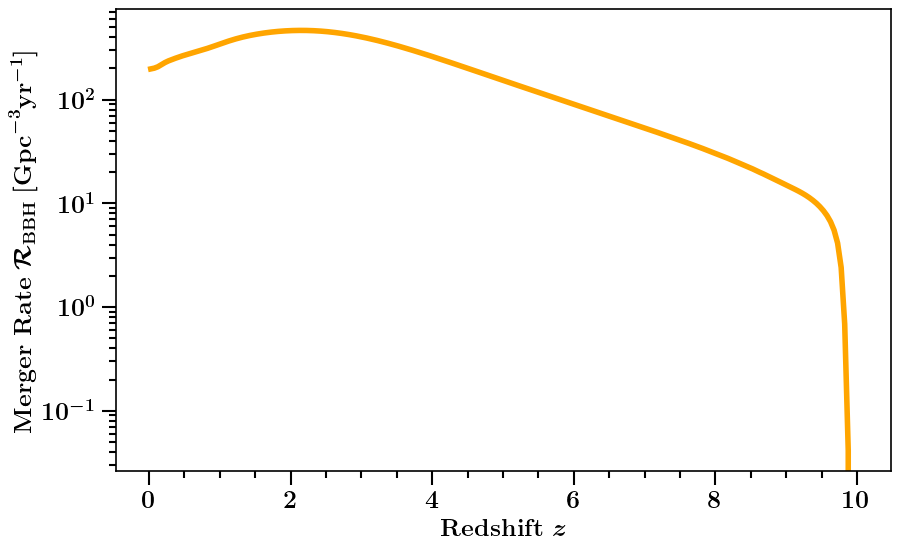

In [52]:
### let's plot the rate from the weights that were already provided in the orginal datafile ['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']

## the parameters that belong to this (check from paper)
mu_0 = 0.025
mu_z = -0.05
sigma_0 = 1.125
sigma_z = 0.05

merger_rate_per_binary_per_redshift = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['merger_rate'][()]
redshift_bin_edges   = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['redshifts'][()]

# take the middle of the redshifts (they are currently bin edges)
redshifts = (redshift_bin_edges[:-1] + redshift_bin_edges[1:])/2 
merger_rate = np.sum(merger_rate_per_binary_per_redshift, axis=0)


f, ax= plt.subplots(ncols=1,nrows=1, figsize=(10,6))

plt.plot(redshifts, merger_rate, lw=4, color='orange')
#make fancy plot: 
fontsize=16
ylabel = r'$\textbf{Merger Rate}$ $\mathcal{R}_{\rm{BBH}}$ $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
xlabel = r'$\textbf{Redshift } z$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()


## Now lets re-run it with different parameters 

work in progress! To be Updated soon!